## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
full_data_df = mouse_df.merge(study_df, how='outer', on='Mouse ID')
# Display the data table for preview
# len(mouse_df) # 249 before dropping duplicate data
# len(full_data_df) # 1893 before dropping duplicate data
# len(study_df)
# study_df.head()
# print(full_data_df.loc[full_data_df["Mouse ID"] == 'g989'])
# full_data_df.head()

In [2]:
# Check the number of mice
mouse_count = full_data_df['Mouse ID'].nunique()
print(f'Initial mouse count: {mouse_count}')

Initial mouse count: 249


In [ ]:
# Scratch code to delete for final submission
mice = {
    "Mouse" : ['A', 'B', 'C', 'D', 'E'],
    "Sex" : ['Male', 'Female', 'Male', 'Female', 'Male']
}
times = {
    "Mouse" : ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'E', 'E'],
    "Time" : [0, 5, 0, 5, 0, 0, 5, 10, 0, 5, 0, 5]
}
micedf = pd.DataFrame(mice)
timesdf = pd.DataFrame(times)
fulldf = micedf.merge(timesdf, on="Mouse", how="outer")


# g = fulldf.drop_duplicates(["Mouse", "Time"], keep=False)
# g

s = fulldf.duplicated(["Mouse", "Time"])
dupes = []
for itm in s.iteritems():
    if itm[1]:
        dupes.append(fulldf.loc[itm[0]]["Mouse"])

indeces = fulldf[ fulldf['Mouse'] == dupes[0] ].index
fulldf.drop(indeces, inplace=True)
fulldf

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID 
# and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.

# Get duplicate mouse data - incomplete
duplicate_mouse_data = full_data_df[full_data_df[['Mouse ID', 'Timepoint']].duplicated()]

# Get the mouse IDs with duplicate data to fetch the COMPLETE duplicate mouse data set
duplicate_mouse_id_list = list(duplicate_mouse_data['Mouse ID'].unique())
print(f'List of Mouse IDs with duplicate data: {duplicate_mouse_id_list}')

# Get ALL DATA for these Mouse IDs
full_duplicate_mouse_data = full_data_df[full_data_df['Mouse ID'].isin(duplicate_mouse_id_list)]
print('\nFull data for the duplicate Mouse IDs: ')
display(full_duplicate_mouse_data)

List of Mouse IDs with duplicate data: ['g989']

Full data for the duplicate Mouse IDs: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop all duplicate Mouse ID Data
full_cleansed_data_df = full_data_df[~full_data_df['Mouse ID'].isin(duplicate_mouse_id_list)]
full_cleansed_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# # We will get the Mouse IDs that have duplicate timepoints and then 
# # delete ALL DATA associated with that Mouse ID:
# timepoint_dup_series = full_data_df.duplicated(["Mouse ID", "Timepoint"])

# timepoint_dups = [] # empty list to keep track of duplicated Mouse IDs

# for dup_data in timepoint_dup_series.iteritems():
#     if dup_data[1]: # True means it has duplicate Timepoints
#         timepoint_dups.append(full_data_df.loc[dup_data[0]]["Mouse ID"])
# #timepoint_dups

# # Create a clean DataFrame by dropping the duplicate mouse by its ID.

# # use the set function to remove duplicates from this list
# # use the list function on the set to turn it back into a list
# timepoint_dups = list(set(timepoint_dups)) 

# # Now we need the indeces of the rows with duplicate data
# indeces_to_drop = full_data_df[ full_data_df['Mouse ID'] == timepoint_dups[0] ].index
    
# # Drop these rows from the full_data_df
# full_data_df.drop(indeces_to_drop, inplace=True)

In [5]:
# Check the number of mice after dropping duplicate Mouse ID data
new_mouse_count = full_cleansed_data_df['Mouse ID'].nunique()
print(f'Mouse count after cleaning data: {new_mouse_count}')

Mouse count after cleaning data: 248


## Summary Statistics

In [6]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Method 2: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

# summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
description_df = full_cleansed_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem', ]})
print('Summary Statistics Table')
description_df

Summary Statistics Table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice')

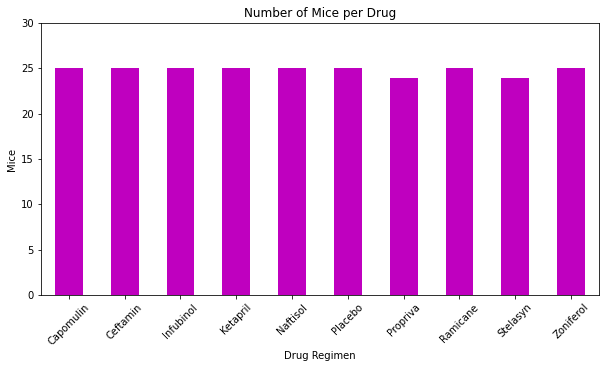

In [13]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
## Note: this plot will be identical to the one that uses Pyplot

#ramicane = full_cleansed_data_df[full_cleansed_data_df['Drug Regimen'].isin(['Ramicane'])]
#ramicane['Mouse ID'].value_counts() # 25 mice had ramicane
#display(full_cleansed_data_df[full_cleansed_data_df['Drug Regimen'].isin(['Ramicane'])])
#print(type(full_cleansed_data_df.groupby('Drug Regimen')["Mouse ID"].nunique()))
#print(full_cleansed_data_df.groupby('Drug Regimen')["Mouse ID"].nunique())

mouse_counts_per_drug_series = full_cleansed_data_df.groupby('Drug Regimen')["Mouse ID"].nunique()
mp = mouse_counts_per_drug_series.plot(kind='bar', color='m', rot=45, ylim=(0, 30), title='Number of Mice per Drug', figsize=(10,5))
mp.set_ylabel('Mice')


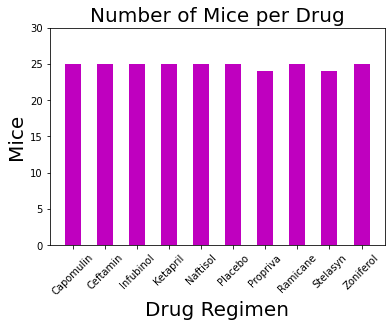

In [8]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
##  Note: this plot will be identical to the one that uses Pandas

values = mouse_counts_per_drug_series.values.tolist()
labels = mouse_counts_per_drug_series.index.tolist()

x_axis = np.arange(len(values))

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=45)

# Plot
plt.bar(x_axis, values, color='m', align='center', width=0.5)

# Labels
font = {'size' : 20, 'color' : 'black'}
plt.xlabel('Drug Regimen', **font)
plt.ylabel('Mice', **font)
plt.title('Number of Mice per Drug', **font)



# Set size
plt.rcParams["figure.figsize"] = (20,5)
plt.ylim(0, 30)

plt.show()


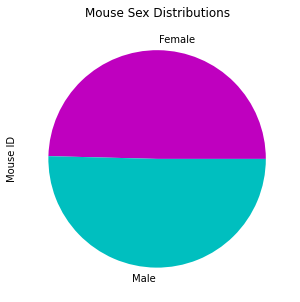

In [11]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot

mouse_sexes_series = full_cleansed_data_df.groupby('Sex')["Mouse ID"].nunique()
mpie = mouse_sexes_series.plot(kind='pie', colors=['m', 'c'], title='Mouse Sex Distributions', figsize=(10,5))


Text(0.5, 1.0, 'Mouse Sex Distributions')

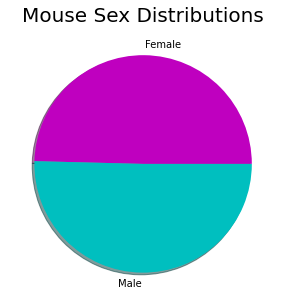

In [79]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

plt_pie_x_values = mouse_sexes_series.values.tolist()
plt_pie_labels = mouse_sexes_series.index.tolist()

plt.pie(plt_pie_x_values, labels=plt_pie_labels, colors=['m','c'], shadow=True)

# plt.xlabel('Drug Regimen')
# plt.ylabel('Mice', **font)
plt.title('Mouse Sex Distributions', **font)

## Quartiles, Outliers and Boxplots

In [ ]:
# latest_timepoint_df = new_df.groupby(['Drug Regimen', 'Mouse ID']).max()
# l = latest_timepoint_df['Timepoint'].tolist()
# l
# # i = new_df.groupby(['Drug Regimen', 'Mouse ID']).max().index
# # print(i)

# latest_timepoint_df['Final Tumor Volume'] = ''#new_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint']

# print(latest_timepoint_df.head())
# print(latest_timepoint_df.shape)

#final_tumor_volume = full_cleansed_data_df[full_cleansed_data_df['Timepoint'].isin(latest_timepoint_df['Timepoint'])]['Tumor Volume (mm3)']
#final_tumor_volume
#latest_timepoint_df.head()

#latest_tumor_df = full_cleansed_data_df[full_cleansed_data_df['Timepoint'].isin(latest_timepoint_df['Timepoint'])]
#latest_tumor_df

In [85]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = full_cleansed_data_df[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]

final_tumor_vol_df = new_df.sort_values('Timepoint', ascending=False).drop_duplicates(['Drug Regimen', 'Mouse ID'])
final_tumor_vol_df.sort_values('Drug Regimen')



,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
144,Capomulin,m957,33.329098,45
104,Capomulin,u364,31.023923,45
390,Capomulin,r944,41.581521,45
317,Capomulin,j246,38.753265,35
340,Capomulin,w150,39.952347,10
...,...,...,...,...
1660,Zoniferol,w140,47.717952,5
1434,Zoniferol,q633,70.827796,45
1416,Zoniferol,q511,68.611061,45
667,Zoniferol,c302,64.575222,45


In [86]:
# Filter out the data for the 4 drugs
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_filtered_df = final_tumor_vol_df[ (final_tumor_vol_df['Drug Regimen'] == drug_list[0]) | (final_tumor_vol_df['Drug Regimen'] == drug_list[1]) | (final_tumor_vol_df['Drug Regimen'] == drug_list[2]) | (final_tumor_vol_df['Drug Regimen'] == drug_list[3]) ]

print(f'Full data for tumor volume at latest timepoint, grouped by Drug and Mouse ID for the 4 drugs: {final_tumor_vol_filtered_df.shape[0]} rows.')
final_tumor_vol_filtered_df.head(10)

Full data for tumor volume at latest timepoint, grouped by Drug and Mouse ID for the 4 drugs: 100 rows.


,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
360,Capomulin,g316,40.159220,45
124,Capomulin,y793,31.896238,45
1855,Ceftamin,y865,64.729837,45
350,Capomulin,v923,40.658124,45
1379,Ceftamin,p438,61.433892,45
134,Capomulin,r554,32.377357,45
337,Capomulin,j119,38.125164,45
327,Ramicane,a411,38.407618,45
144,Capomulin,m957,33.329098,45
114,Ramicane,n364,31.095335,45


In [106]:
# Make some dictionaties with data pertaining to each drug
# Put the dictionaries into a list
drug_dict_list = []

# Get the list of Tumor Volumes assocaited w each drug
for drug in drug_list:
    tumor_vols_list = final_tumor_vol_filtered_df[ final_tumor_vol_filtered_df['Drug Regimen'] == drug ]['Tumor Volume (mm3)'].tolist()
    dic = {"name" : drug, "tumor vol list" : tumor_vols_list}
    drug_dict_list.append(dic)
    
print(drug_dict_list)


[{'name': 'Capomulin', 'tumor vol list': [40.1592203, 31.896238399999998, 40.65812366, 32.37735684, 38.125164399999996, 33.32909778, 40.72857787, 41.58152074, 31.02392294, 41.48300765, 37.07402422, 37.31184577, 36.04104736, 34.45529799, 38.98287774, 38.93963263, 38.84687569, 23.34359787, 28.43096411, 28.48403281, 47.68596303, 38.75326548, 30.48598484, 46.53920617, 39.95234669]}, {'name': 'Ramicane', 'tumor vol list': [38.407618299999996, 31.09533505, 40.66771292, 40.65900627, 31.56046955, 38.81036633, 33.56240217, 36.37451039, 36.13485243, 37.22565033, 33.39765251, 37.31123552, 32.97852192, 30.63869575, 30.27623175, 29.12847181, 45.22086888, 43.04754260000001, 30.56462509, 22.05012627, 36.56165229, 38.34200823, 43.41938077, 44.18345092, 43.16637266]}, {'name': 'Infubinol', 'tumor vol list': [62.43540402, 60.91876652, 62.75445141, 66.19691151, 67.68556862, 67.97341878, 65.52574285, 72.2267309, 66.08306589, 67.28962147, 62.11727887, 55.62942846, 54.65654872, 60.16518046, 60.96971133, 58.

In [107]:
# Calculate the quartiles and IQR and quantitatively 
# iqr_capo = st.iqr(capomulin_tumor_vols_list)
# iqr_ceft = st.iqr(ceftamin_tumor_vols_list)
# iqr_infub = st.iqr(infubinol_tumor_vols_list)
# iqr_rami = st.iqr(ramicane_tumor_vols_list)

# print(f'The IQR of the final tumor size data for Capomulin is: {iqr_capo}')
# print(f'The IQR of the final tumor size data for Ramicane is: {iqr_rami}')
# print(f'The IQR of the final tumor size data for Infubinol is: {iqr_infub}')
# print(f'The IQR of the final tumor size data for Ceftamin is: {iqr_ceft}')

# determine if there are any potential outliers across all four treatment regimens.
def find_outliers(val_list):
    iqr = st.iqr(val_list)
    q1 = np.quantile(val_list, 0.25)
    q3 = np.quantile(val_list, 0.75)
    outliers = []
    
    for val in val_list:
        if (val <= q1 - 1.5 * iqr) or (val >= q3 + 1.5 * iqr):
            outliers.append(val)
        
    return outliers

capo_outliers = find_outliers(capomulin_tumor_vols_list)
rami_outliers = find_outliers(ramicane_tumor_vols_list)
infu_outliers = find_outliers(infubinol_tumor_vols_list)
ceft_outliers = find_outliers(ceftamin_tumor_vols_list)
outlier_lists=[capo_outliers, rami_outliers, infu_outliers, ceft_outliers]

print(f'Infubinol has one possible outlier: {infu_outliers}')

Infubinol has one possible outlier: [36.321345799999996]


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
